In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from scipy import stats
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [207]:
#'dbscan.csv' pandas사용해서ㅕ 읽고 인덱스를 날짜 타입으로 변환

In [208]:
df = pd.read_csv('dbscan.csv')

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1227 non-null   object 
 1   KOSPI        1227 non-null   float64
 2   S&P 500      1185 non-null   float64
 3   Gold         1187 non-null   float64
 4   Oil(WTI)     1187 non-null   float64
 5   US 10Y Bond  1188 non-null   float64
 6   KRW/USD      1225 non-null   float64
 7   JPY/USD      1225 non-null   float64
dtypes: float64(7), object(1)
memory usage: 76.8+ KB


In [210]:
#df.loc['Date'] = df['Date'].to_timestamp

In [211]:
df['Date'] = pd.to_datetime(df['Date'])

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1227 non-null   datetime64[ns]
 1   KOSPI        1227 non-null   float64       
 2   S&P 500      1185 non-null   float64       
 3   Gold         1187 non-null   float64       
 4   Oil(WTI)     1187 non-null   float64       
 5   US 10Y Bond  1188 non-null   float64       
 6   KRW/USD      1225 non-null   float64       
 7   JPY/USD      1225 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 76.8 KB


In [213]:
df = df.set_index('Date')
df

,KOSPI,S&P 500,Gold,Oil(WTI),US 10Y Bond,KRW/USD,JPY/USD
Date,,,,,,,
2020-05-15,1927.280029,2863.699951,1753.400024,29.430000,139.328125,1225.459961,107.364998
2020-05-18,1937.109985,2953.909912,1731.800049,31.820000,138.593750,1232.089966,107.208000
2020-05-19,1980.609985,2922.939941,1744.199951,32.500000,138.859375,1224.199951,107.380997
2020-05-20,1989.640015,2971.610107,1750.599976,33.490002,139.078125,1224.319946,107.809998
2020-05-21,1998.310059,2948.510010,1720.500000,33.919998,139.062500,1226.550049,107.591003
...,...,...,...,...,...,...,...
2025-05-09,2577.270020,5659.910156,3335.399902,61.020000,110.812500,1403.849976,146.014999
2025-05-12,2607.330078,5844.189941,3220.000000,61.950001,110.156250,1395.170044,145.811996
2025-05-13,2608.419922,5886.549805,3240.300049,63.669998,109.968750,1416.030029,148.309998


In [214]:
df.isnull().sum()

KOSPI           0
S&P 500        42
Gold           40
Oil(WTI)       40
US 10Y Bond    39
KRW/USD         2
JPY/USD         2
dtype: int64

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1227 entries, 2020-05-15 to 2025-05-15
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   KOSPI        1227 non-null   float64
 1   S&P 500      1185 non-null   float64
 2   Gold         1187 non-null   float64
 3   Oil(WTI)     1187 non-null   float64
 4   US 10Y Bond  1188 non-null   float64
 5   KRW/USD      1225 non-null   float64
 6   JPY/USD      1225 non-null   float64
dtypes: float64(7)
memory usage: 76.7 KB


In [216]:
#결측치를 적당히 보간법으로 채우는 함수
#df = df.interpolate()
#interpolate를 쓸려면 데이터가 선행 적이어야한다. 즉 시계열 데이터라서 갑자기 데이터가 높거나 떨어지지 않는 다는 가정을 한다.
#앞에가 비었을 때는 밑에꺼 사용
df = df.fillna(method='ffill')

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1227 entries, 2020-05-15 to 2025-05-15
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   KOSPI        1227 non-null   float64
 1   S&P 500      1227 non-null   float64
 2   Gold         1227 non-null   float64
 3   Oil(WTI)     1227 non-null   float64
 4   US 10Y Bond  1227 non-null   float64
 5   KRW/USD      1227 non-null   float64
 6   JPY/USD      1227 non-null   float64
dtypes: float64(7)
memory usage: 76.7 KB


In [218]:
#Q. 이상치 찾기

In [219]:
# z_score = stats.zscore(df)
# #abs 사용시 데이터가 모두 양수가 되므로 양수가 되면 안되는 수에서는 사용해서는 안된다.
# abs_z_score = np.abs(z_score)
# #3을 넘으면 뭔가 뾰족하다.

In [220]:
def remove_outliers(data, threshold=3):
    z_score = stats.zscore(data)
    abs_z_score = np.abs(z_score)
    filtered_entries = (abs_z_score < 3).all(axis=1)
    return data[filtered_entries]


df_no_outliers = remove_outliers(df)

In [221]:
df_no_outliers

,KOSPI,S&P 500,Gold,Oil(WTI),US 10Y Bond,KRW/USD,JPY/USD
Date,,,,,,,
2020-05-15,1927.280029,2863.699951,1753.400024,29.430000,139.328125,1225.459961,107.364998
2020-05-18,1937.109985,2953.909912,1731.800049,31.820000,138.593750,1232.089966,107.208000
2020-05-19,1980.609985,2922.939941,1744.199951,32.500000,138.859375,1224.199951,107.380997
2020-05-20,1989.640015,2971.610107,1750.599976,33.490002,139.078125,1224.319946,107.809998
2020-05-21,1998.310059,2948.510010,1720.500000,33.919998,139.062500,1226.550049,107.591003
...,...,...,...,...,...,...,...
2025-04-03,2486.699951,5396.520020,3097.000000,66.949997,112.640625,1466.040039,147.871994
2025-04-04,2465.419922,5074.080078,3012.000000,61.990002,113.046875,1450.680054,146.231003
2025-04-07,2328.199951,5062.250000,2951.300049,60.700001,112.062500,1458.520020,145.432999


In [222]:
#전날과 다음날을 비교하는 방법인데 날짜 데이터는 특히나 조심해야한다.
returns = np.log(df_no_outliers / df_no_outliers.shift(1)).dropna()
returns

,KOSPI,S&P 500,Gold,Oil(WTI),US 10Y Bond,KRW/USD,JPY/USD
Date,,,,,,,
2020-05-18,0.005087,0.031015,-0.012395,0.078080,-0.005285,0.005396,-0.001463
2020-05-19,0.022208,-0.010540,0.007135,0.021145,0.001915,-0.006424,0.001612
2020-05-20,0.004549,0.016514,0.003663,0.030007,0.001574,0.000098,0.003987
2020-05-21,0.004348,-0.007804,-0.017344,0.012758,-0.000112,0.001820,-0.002033
2020-05-22,-0.014202,0.002351,0.008162,-0.019950,0.000674,0.005561,0.000372
...,...,...,...,...,...,...,...
2025-04-03,-0.007676,-0.049606,-0.013757,-0.068684,0.010178,-0.002677,-0.012841
2025-04-04,-0.008594,-0.061609,-0.027830,-0.076973,0.003600,-0.010532,-0.011159
2025-04-07,-0.057267,-0.002334,-0.020359,-0.021029,-0.008746,0.005390,-0.005472


In [223]:
#상관관계!!!
returns.corr()

,KOSPI,S&P 500,Gold,Oil(WTI),US 10Y Bond,KRW/USD,JPY/USD
KOSPI,1.000000,0.176979,0.094750,0.107874,-0.038090,-0.227364,-0.039115
S&P 500,0.176979,1.000000,0.125040,0.217118,0.030009,0.002459,0.035489
Gold,0.094750,0.125040,1.000000,0.155471,0.319805,-0.049699,-0.015281
Oil(WTI),0.107874,0.217118,0.155471,1.000000,-0.144744,0.003451,-0.019791
US 10Y Bond,-0.038090,0.030009,0.319805,-0.144744,1.000000,-0.075264,-0.050302
KRW/USD,-0.227364,0.002459,-0.049699,0.003451,-0.075264,1.000000,0.361346
JPY/USD,-0.039115,0.035489,-0.015281,-0.019791,-0.050302,0.361346,1.000000


In [224]:
#Q 04 스케일 조정을 합시다.


In [225]:
scaler = RobustScaler()
scaler_returns = scaler.fit_transform(returns)

In [226]:
#Q 05

In [227]:
#05 K-Means의 K를 찾아보자

In [228]:

#평가를 위한 점수
#비지도를 평가하기 위해서 통계치를 기반으로 모델을 평가하는 방법
inertia = []
silhoustte_scores = []
k_range = range(2,10)

for k in k_range:
    #KMeans 매개변수를 설정
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans_labels = kmeans.fit_predict(scaler_returns)
    inertia.append(kmeans.inertia_)
    silhoustte_scores.append(silhouette_score(scaler_returns,kmeans_labels))
    #예측
    #silhousette_scores를 측정
    #k값이 중요
    pass

In [229]:
inertia

[6186.462272138323,
 5654.318760300401,
 5257.784371812895,
 4972.9130628279145,
 4752.036238181909,
 4552.9941452205085,
 4388.195980573257,
 4221.46043064225]

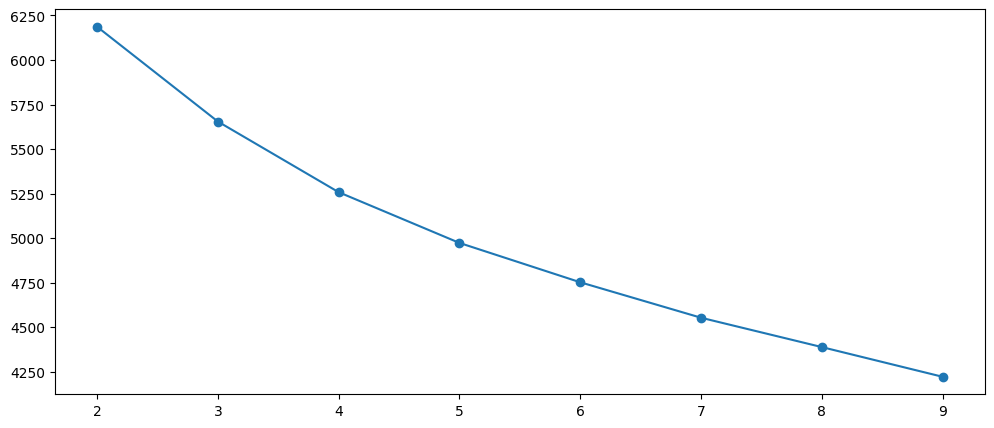

In [230]:
plt.figure(figsize=(12,5))
plt.plot(k_range,inertia, "o-")

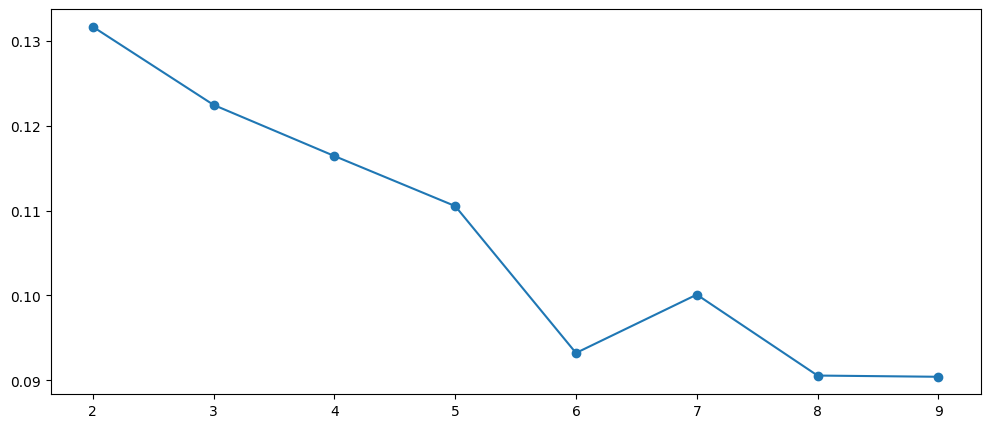

In [231]:
plt.figure(figsize=(12,5))
plt.plot(k_range,silhoustte_scores, "o-")

In [232]:
#Q DBSCAN

In [233]:
eps_range = np.arange(0.3,1.5,0.1)
min_samples_range = [3,5,7,10]
best_silhoustte = -1
best_eps = 0
best_min_sample = 0

In [234]:


for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps,min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(scaler_returns)
        #최소한 클러스터는 1개 이상, 모든 포인트가 -1이 아니었으면 좋겠음
        n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        if n_clusters > 1 and np.sum(dbscan_labels != -1) > 10:
            non_noise_idx = dbscan_labels != -1
            if np.sum(non_noise_idx) > 1:
                score = silhouette_score(scaler_returns[non_noise_idx], dbscan_labels[non_noise_idx])
                if score > best_silhoustte:
                    best_silhoustte = score
                    best_eps = eps
                    best_min_sample = min_samples
                

In [235]:
print(best_silhoustte, best_eps, best_min_sample)

0.2599957774510234 1.4000000000000004 5


In [236]:
kmeans = KMeans(n_clusters=best_min_sample, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(scaler_returns)

In [237]:
dbscan = DBSCAN(eps=1.4,min_samples=5)
dbscan_labels = dbscan.fit_predict(scaler_returns)

In [239]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaler_returns)
pca.explained_variance_ratio_

array([0.22161609, 0.20190669])

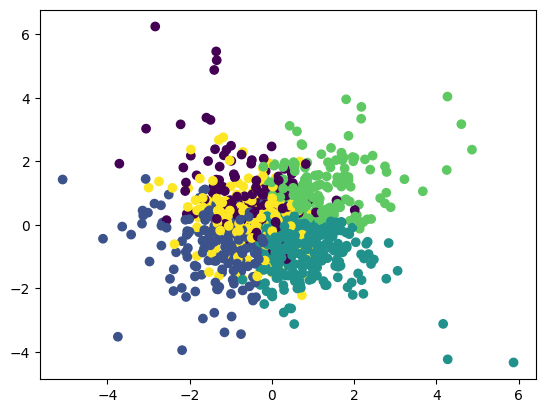

In [242]:
plt.scatter(pca_components[:,0],pca_components[:,1],c=kmeans_labels, cmap='viridis')

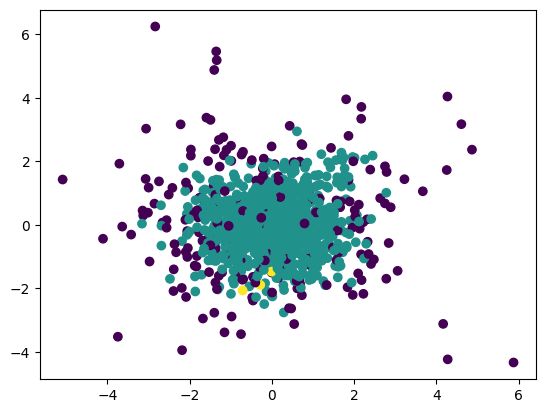

In [243]:
plt.scatter(pca_components[:,0],pca_components[:,1],c=dbscan_labels,cmap='viridis')

In [ ]:
for i in range(5):
    mask = kmeans_labels == i
    center = np.mean(pca_components[mask], axis=0)
    plt.annotate(
        f"C"
    )